In [31]:
import pandas
import os
import json
#clustering前dataPreprocessing

# 讀取v16版本MITRE ATT&CK的technique資料
file_ttpData=os.path.join(os.getcwd(),"data","techniques_detailed.json")
with open(file_ttpData,"r",encoding='utf-8')as file:
    json_filettpdata=json.load(file)
list_clusteringReference=[i.lower() for i in json_filettpdata["enterprise"]]

# 讀取v16版本MITRE ATT&CK的software資料 
file_Mitre_software_stastistic_Enterprise=os.path.join(os.getcwd(),"data","Mitre_software_stastistic_Enterprise.xlsx")
dict_Mitre_software_stastistic_Enterprise=pandas.read_excel(file_Mitre_software_stastistic_Enterprise)
### 建立Malware種類索引
### 這邊也是每筆資料的label
index_malwareType = list(dict.fromkeys(dict_Mitre_software_stastistic_Enterprise['Malware Type New']))
### 以下會被做成one hot encoding
dict_Mitre_software_stastistic_Enterprise['TTPs']

0                 T1071.001, T1573.001, T1083, T1070.006
1      T1071.001, T1059.003, T1573.001, T1083, T1057,...
2      T1071.001, T1059.003, T1140, T1105, T1027.003,...
3      T1071.001, T1059.003, T1005, T1140, T1083, T11...
4                        T1059.003, T1573.002, T1546.003
                             ...                        
519    T1071.001, T1560.002, T1059.003, T1543.003, T1...
520    T1005, T1001.002, T1068, T1083, T1105, T1027.0...
521    T1059.003, T1543.003, T1083, T1070.004, T1112,...
522    T1134.002, T1071.001, T1071.002, T1059.003, T1...
523    T1005, T1140, T1105, T1036.004, T1106, T1027.0...
Name: TTPs, Length: 524, dtype: object

In [37]:
for i in index_malwareType:print(i.split("/"))

['RAT']
['malware']
['downloader']
['backdoor']
['trojan']
['worm']
['ransomware']
['wiper ', ' ransomware']
['trojan ', ' stealer']
['spyware']
['stealer']
['backdoor ', ' downloader']
['wiper']
['toolkit']
['loader']
['bootkit']
['virus']
['DoS']
['dropper']
['backdoor ', ' RAT']
['tool']
['exploit']
['backdoor ', ' trojan']
['loader ', ' stealer']
['rootkit']
['loader ', ' backdoor']
['RAT ', ' backdoor']
['botnet']
['trojan ', ' dropper']
['behavior']
['trojan ', ' downloader']


One-hot encoded matrix:
     t1548  t1134  t1531  t1087  t1098  t1650  t1583  t1595  t1557  t1071  \
0        0      0      0      0      0      0      0      0      0      0   
1        0      0      0      0      0      0      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        0      0      0      0      0      0      0      0      0      0   
4        0      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
519      0      0      0      0      0      0      0      0      0      0   
520      0      0      0      0      0      0      0      0      0      0   
521      0      0      0      0      0      0      0      0      0      0   
522      0      0      0      0      0      0      0      0      0      0   
523      0      0      0      0      0      0      0      0      0      0   

     ...  t1535  t1550  t1204  t1078  t1125  t1497 

c:\Users\nick5\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2818: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


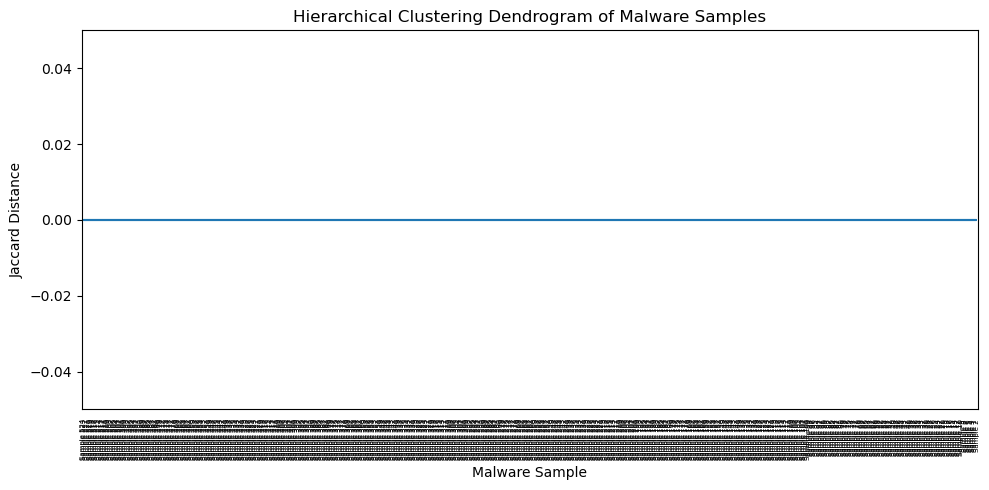

Cluster assignments for malware samples:
Sample 1: Cluster 1
Sample 2: Cluster 1
Sample 3: Cluster 1
Sample 4: Cluster 1
Sample 5: Cluster 1
Sample 6: Cluster 1
Sample 7: Cluster 1
Sample 8: Cluster 1
Sample 9: Cluster 1
Sample 10: Cluster 1
Sample 11: Cluster 1
Sample 12: Cluster 1
Sample 13: Cluster 1
Sample 14: Cluster 1
Sample 15: Cluster 1
Sample 16: Cluster 1
Sample 17: Cluster 1
Sample 18: Cluster 1
Sample 19: Cluster 1
Sample 20: Cluster 1
Sample 21: Cluster 1
Sample 22: Cluster 1
Sample 23: Cluster 1
Sample 24: Cluster 1
Sample 25: Cluster 1
Sample 26: Cluster 1
Sample 27: Cluster 1
Sample 28: Cluster 1
Sample 29: Cluster 1
Sample 30: Cluster 1
Sample 31: Cluster 1
Sample 32: Cluster 1
Sample 33: Cluster 1
Sample 34: Cluster 1
Sample 35: Cluster 1
Sample 36: Cluster 1
Sample 37: Cluster 1
Sample 38: Cluster 1
Sample 39: Cluster 1
Sample 40: Cluster 1
Sample 41: Cluster 1
Sample 42: Cluster 1
Sample 43: Cluster 1
Sample 44: Cluster 1
Sample 45: Cluster 1
Sample 46: Cluster 1
Sa

In [23]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 參考清單：所有技術代碼均為小寫格式
ref_list = list_clusteringReference

# 假設的惡意程式資料：每個樣本是一個包含技術編碼的清單（可能含版本號）
malware_samples = dict_Mitre_software_stastistic_Enterprise['TTPs']

def normalize_code(code):
    """
    標準化技術代碼：轉為小寫並取小數點前的部分。
    例如："T1071.001" 會變成 "t1071"
    """
    return code.lower().split('.')[0]

# 建立 one-hot encoding 矩陣
num_samples = len(malware_samples)
num_features = len(ref_list)
onehot_matrix = np.zeros((num_samples, num_features), dtype=int)

# 為每筆惡意程式資料進行編碼
for i, sample in enumerate(malware_samples):
    # 將該筆資料的所有技術標準化後儲存至集合中（避免重複）
    normalized_codes = set(normalize_code(code) for code in sample)
    for j, ref in enumerate(ref_list):
        if ref in normalized_codes:
            onehot_matrix[i, j] = 1

# 利用 Pandas 檢視 one-hot encoding 結果
df = pd.DataFrame(onehot_matrix, columns=ref_list)
print("One-hot encoded matrix:")
print(df)

# ------------------------------------------------------
# 以 one-hot encoding 結果作為聚類資料來源
# 這裡採用階層式聚類，使用 Jaccard 距離計算樣本間差異

# 計算樣本間的 Jaccard 距離 (行與行之間)
distances = pdist(onehot_matrix, metric='jaccard')
# 可轉換為距離矩陣（如有需要）
dist_matrix = squareform(distances)

# 使用平均連結法進行階層式聚類
Z = linkage(distances, method='average')

# 繪製聚類樹狀圖
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=[f"Sample {i+1}" for i in range(num_samples)])
plt.title("Hierarchical Clustering Dendrogram of Malware Samples")
plt.xlabel("Malware Sample")
plt.ylabel("Jaccard Distance")
plt.tight_layout()
plt.show()

# 根據聚類結果，設定平坦聚類（例如分為 2 群）
clusters = fcluster(Z, t=2, criterion='maxclust')
print("Cluster assignments for malware samples:")
for i, cluster_id in enumerate(clusters):
    print(f"Sample {i+1}: Cluster {cluster_id}")


In [ ]:
import numpy as np
import pandas as pd

def compute_type_techniques(onehot_matrix, type_labels, target_type, technique_labels, threshold=0.5):
    """
    計算指定 type 中各項技術的出現頻率，並根據門檻回傳常見的技術列表

    參數:
        onehot_matrix: np.array, 形狀為 (n_samples, n_techniques)，one-hot encoding 結果
        type_labels: list 或 np.array, 長度為 n_samples，代表每個樣本的 type 標籤
        target_type: 目標 type 的名稱（字串）
        technique_labels: list, 長度為 n_techniques，各技術的名稱
        threshold: 出現頻率門檻（預設 0.5，即超過 50% 被視為常見）
    傳回:
        common_techniques: list, 屬於該 type 且頻率大於門檻的技術名稱
        freq_series: pd.Series, 各技術在該 type 中的出現頻率（方便進一步分析）
    """
    # 找出屬於 target_type 的樣本索引
    indices = [i for i, fam in enumerate(type_labels) if fam == target_type]
    if len(indices) == 0:
        raise ValueError("指定的 type 在資料中不存在。")
    
    # 取出目標 type 的子矩陣
    sub_matrix = onehot_matrix[indices, :]
    
    # 計算每個技術的出現頻率
    freq = np.mean(sub_matrix, axis=0)  # shape: (n_techniques,)
    
    # 利用 Pandas 方便顯示與後續分析
    freq_series = pd.Series(freq, index=technique_labels)
    
    # 選出頻率大於門檻的技術
    common_techniques = freq_series[freq_series >= threshold].index.tolist()
    
    return common_techniques, freq_series

# 範例資料：假設有 5 筆惡意程式樣本，每筆樣本經過 one-hot encoding 後有 6 個技術
onehot_matrix = np.array([
    [1, 0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0]
])

# family 標籤，每筆樣本分別屬於不同 family (例如 "FamilyA" 與 "FamilyB")
type_labels = ["FamilyA", "FamilyA", "FamilyB", "FamilyA", "FamilyB"]

# 技術名稱列表 (對應 one-hot encoding 的欄位)
technique_labels = ['T1071', 'T1573', 'T1083', 'T1070', 'T1098', 'T1650']

# 計算 "FamilyA" 的常見技術，假設門檻設為 0.66 (即超過 66% 的樣本使用)
common_techniques, freq_series = compute_family_techniques(onehot_matrix, family_labels, "FamilyA", technique_labels, threshold=0.66)

print("FamilyA 的技術出現頻率:")
print(freq_series)
print("\nFamilyA 的常見技術 (頻率 ≥ 66%):")
print(common_techniques)
